# Analysis of San Francisco Airbnb Listings

In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [209]:
#Read in csv downloaded from http://insideairbnb.com/
listing_data=pd.read_csv('C:\\Users\\miche\\Documents\\Springboard\\Project\\Airbnb\\Data\\listings.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Data Cleaning

In [210]:
listing_data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,10988680,https://www.airbnb.com/rooms/10988680,20170401232214,2017-04-02,"Simple, new, clean accommodation",I signed a new lease and moving out of my plac...,"This is clean, simple, affordable accommodatio...",I signed a new lease and moving out of my plac...,none,Place is very conveniently located in the Miss...,...,10.0,f,NaN,SAN FRANCISCO,f,flexible,f,f,1,0.07
1,8053481,https://www.airbnb.com/rooms/8053481,20170401232214,2017-04-02,Spacious 2BR/2BATH w/Shared Kitchen,Enjoy the whole main floor of our sunny 2-leve...,"We love our big, bright home and we know you w...",Enjoy the whole main floor of our sunny 2-leve...,none,Our Mission District neighborhood is among the...,...,9.0,f,NaN,SAN FRANCISCO,f,strict,f,f,1,0.49
2,14011173,https://www.airbnb.com/rooms/14011173,20170401232214,2017-04-02,Private room - Victorian House in the Mission,Awesome location in the Mission District of SF...,NaN,Awesome location in the Mission District of SF...,none,NaN,...,9.0,f,NaN,SAN FRANCISCO,f,flexible,f,f,3,0.27
3,16142131,https://www.airbnb.com/rooms/16142131,20170401232214,2017-04-02,Spacious 1BR in the Mission District,"Quiet 1 bedroom apartment, with a spacious, we...",NaN,"Quiet 1 bedroom apartment, with a spacious, we...",none,NaN,...,8.0,f,NaN,SAN FRANCISCO,f,flexible,f,f,1,0.48
4,9080622,https://www.airbnb.com/rooms/9080622,20170401232214,2017-04-02,Edwardian flat in heart of Mission,Bedroom with queen bed available. The condo i...,NaN,Bedroom with queen bed available. The condo i...,none,NaN,...,NaN,f,NaN,SAN FRANCISCO,f,flexible,f,f,1,NaN


In [211]:
listing_data.tail()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
8701,2204233,https://www.airbnb.com/rooms/2204233,20170401232214,2017-04-02,Quaint Mission Penthouse Suite,"Three attractive roommates, hard wood floors, ...",NaN,"Three attractive roommates, hard wood floors, ...",none,NaN,...,10.0,f,NaN,SAN FRANCISCO,f,flexible,f,f,1,0.18
8702,13863748,https://www.airbnb.com/rooms/13863748,20170401232214,2017-04-02,COLORFUL Sunny Mission Home,"My place is close to Beretta, Trick Dog, Atlas...",NaN,"My place is close to Beretta, Trick Dog, Atlas...",none,NaN,...,10.0,f,NaN,SAN FRANCISCO,f,flexible,f,f,2,0.24
8703,8702764,https://www.airbnb.com/rooms/8702764,20170401232214,2017-04-02,Heavenly loft in Mission,Beautiful white attic loft. Large window peers...,NaN,Beautiful white attic loft. Large window peers...,none,NaN,...,9.0,f,NaN,SAN FRANCISCO,t,moderate,f,f,4,5.30
8704,6272816,https://www.airbnb.com/rooms/6272816,20170401232214,2017-04-02,"Sunny, Private Room / Valencia St",The sunlight pours into the tall bay windows i...,The sunlight pours into the tall bay windows i...,The sunlight pours into the tall bay windows i...,none,We live off of Valencia St - famous for it's f...,...,9.0,f,STR-0000416,SAN FRANCISCO,f,moderate,f,f,1,3.67
8705,17998286,https://www.airbnb.com/rooms/17998286,20170401232214,2017-04-02,Massive sun-filled room next to Dolores Park,Giant victorian home in the heart of the missi...,NaN,Giant victorian home in the heart of the missi...,none,NaN,...,NaN,f,NaN,SAN FRANCISCO,t,flexible,f,f,1,NaN


In [212]:
listing_data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [213]:
listing_data.shape

(8706, 95)

In [214]:
listing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8706 entries, 0 to 8705
Data columns (total 95 columns):
id                                  8706 non-null int64
listing_url                         8706 non-null object
scrape_id                           8706 non-null int64
last_scraped                        8706 non-null object
name                                8706 non-null object
summary                             8435 non-null object
space                               6224 non-null object
description                         8704 non-null object
experiences_offered                 8706 non-null object
neighborhood_overview               5188 non-null object
notes                               4139 non-null object
transit                             5452 non-null object
access                              5351 non-null object
interaction                         5132 non-null object
house_rules                         5860 non-null object
thumbnail_url                       7230

In [215]:
#Inspecting the price column shows that it is not in the correct datatype
print(listing_data['price'])

0          $49.00
1         $220.00
2         $100.00
3         $117.00
4         $200.00
5         $162.00
6         $230.00
7         $173.00
8         $600.00
9         $250.00
10        $300.00
11        $189.00
12        $130.00
13         $90.00
14         $95.00
15        $325.00
16        $119.00
17        $134.00
18        $490.00
19        $140.00
20        $185.00
21        $550.00
22        $113.00
23        $115.00
24        $155.00
25         $45.00
26        $169.00
27        $186.00
28         $77.00
29        $250.00
          ...    
8676      $170.00
8677      $170.00
8678    $1,500.00
8679      $450.00
8680      $210.00
8681       $80.00
8682       $75.00
8683      $130.00
8684      $114.00
8685      $149.00
8686      $115.00
8687      $109.00
8688       $87.00
8689      $300.00
8690      $250.00
8691      $250.00
8692      $245.00
8693      $179.00
8694      $150.00
8695      $120.00
8696      $100.00
8697       $60.00
8698      $140.00
8699      $295.00
8700      

In [216]:
#Covert the price column to the corret datatype
import re
listing_data['price']=listing_data.price.apply(lambda x: x.replace('$',''))
listing_data['price']=listing_data.price.apply(lambda x: x.replace(',',''))
listing_data['price']=pd.to_numeric(listing_data['price'])

In [217]:
print(listing_data['price'])

0         49.0
1        220.0
2        100.0
3        117.0
4        200.0
5        162.0
6        230.0
7        173.0
8        600.0
9        250.0
10       300.0
11       189.0
12       130.0
13        90.0
14        95.0
15       325.0
16       119.0
17       134.0
18       490.0
19       140.0
20       185.0
21       550.0
22       113.0
23       115.0
24       155.0
25        45.0
26       169.0
27       186.0
28        77.0
29       250.0
         ...  
8676     170.0
8677     170.0
8678    1500.0
8679     450.0
8680     210.0
8681      80.0
8682      75.0
8683     130.0
8684     114.0
8685     149.0
8686     115.0
8687     109.0
8688      87.0
8689     300.0
8690     250.0
8691     250.0
8692     245.0
8693     179.0
8694     150.0
8695     120.0
8696     100.0
8697      60.0
8698     140.0
8699     295.0
8700     285.0
8701      75.0
8702     250.0
8703     120.0
8704     125.0
8705     100.0
Name: price, Length: 8706, dtype: float64


In [218]:
listing_data.describe()

,id,scrape_id,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
count,8.706000e+03,8.706000e+03,8.706000e+03,0.0,8697.000000,8697.000000,0.0,8706.000000,8706.000000,8706.000000,...,8706.000000,6655.000000,6640.000000,6643.000000,6632.000000,6644.000000,6633.000000,6630.000000,8706.000000,6744.000000
mean,8.917276e+06,2.017040e+13,2.331190e+07,NaN,6.083017,6.083017,NaN,37.767743,-122.430262,3.164714,...,24.852975,94.528625,9.651958,9.486377,9.803227,9.799368,9.561737,9.374962,2.724098,1.668198
std,5.415034e+06,5.469064e-02,2.823303e+07,NaN,36.600981,36.600981,NaN,0.021930,0.025466,1.998558,...,45.184393,7.560817,0.767101,0.908616,0.586405,0.598251,0.777876,0.841652,7.121279,3.233035
min,9.580000e+02,2.017040e+13,4.600000e+01,NaN,0.000000,0.000000,NaN,37.706928,-122.511500,1.000000,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.010000
25%,4.123524e+06,2.017040e+13,3.246281e+06,NaN,1.000000,1.000000,NaN,37.753321,-122.442043,2.000000,...,1.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.310000
50%,9.156648e+06,2.017040e+13,1.082904e+07,NaN,1.000000,1.000000,NaN,37.769819,-122.425420,2.000000,...,6.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,0.980000
75%,1.368716e+07,2.017040e+13,3.429182e+07,NaN,2.000000,2.000000,NaN,37.785527,-122.412451,4.000000,...,27.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,2.420000
max,1.800883e+07,2.017040e+13,1.233930e+08,NaN,1114.000000,1114.000000,NaN,37.831093,-122.364759,16.000000,...,488.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,69.000000,223.000000


In [219]:
Listing_data_full=listing_data.copy

### The distribution of the price is heavily skewed to the right. I would take further steps to identify outliers and listings that should not be used as part of the analysis.

In [220]:
listing_data['price'].describe()

count     8706.000000
mean       250.160579
std        474.630624
min          0.000000
25%        100.000000
50%        160.000000
75%        250.000000
max      10000.000000
Name: price, dtype: float64

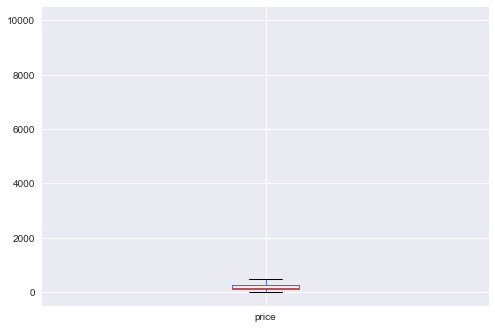

In [221]:
listing_data['price'].plot(kind='box')
plt.show()

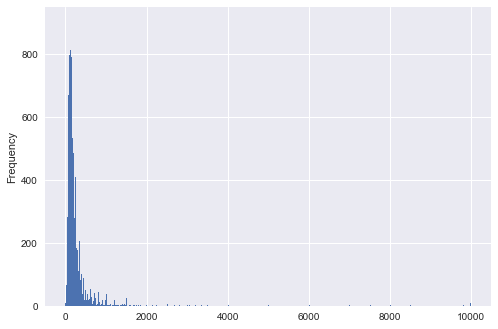

In [222]:
listing_data['price'].plot(kind='hist', bins=500)
plt.show()

### There is one listing priced at zero. It does not look like a valid listing and therefore I am dropping this data point.

In [223]:
listing_data[['id','summary','description','price']][listing_data['price']==0]

,id,summary,description,price
1928,10544305,asdfasdf,asdfasdf this is a test listing do not book no...,0.0


In [224]:
listing_data.drop(1928, inplace=True)

In [225]:
listing_data['price'].describe()

count     8705.000000
mean       250.189316
std        474.650313
min         10.000000
25%        100.000000
50%        160.000000
75%        250.000000
max      10000.000000
Name: price, dtype: float64

### Taking a look at the listings with low prices shows that they are mostly shared room listings.

In [226]:
listing_data[['id','summary','description','price','street','room_type','number_of_reviews','availability_365']][listing_data['price']<=30]

,id,summary,description,price,street,room_type,number_of_reviews,availability_365
392,15852721,Our exceptional appartment perfectly located ...,Our exceptional appartment perfectly located ...,24.0,"Mission District, San Francisco, CA 94110, Uni...",Shared room,5,298
657,17237462,This is a nice little room in a four bedroom h...,This is a nice little room in a four bedroom h...,30.0,"Mission District, San Francisco, CA 94110, Uni...",Private room,2,182
918,16792748,"Great Lone Mountain location, 2 blocks from US...","Great Lone Mountain location, 2 blocks from US...",10.0,"Richmond District, San Francisco, CA 94118, Un...",Private room,0,90
1588,17478285,Affordable Futon bed in SF in a peaceful neigh...,Affordable Futon bed in SF in a peaceful neigh...,30.0,"San Francisco, CA 94124, United States",Shared room,7,330
2275,11864708,This is a test listing to determine why the ad...,This is a test listing to determine why the ad...,10.0,"SoMa, San Francisco, CA 94103, United States",Entire home/apt,0,0
3965,474001,Welcome to our home for budget-minded students...,Welcome to our home for budget-minded students...,29.0,"Chinatown, San Francisco, CA 94108, United States",Shared room,1,365
3980,8408841,Rich Silverstein is responsible for some of th...,Rich Silverstein is responsible for some of th...,22.0,"Chinatown, San Francisco, CA 94108, United States",Private room,0,0
3983,8408931,Comfy “Got Milk?” director's chair located in ...,Comfy “Got Milk?” director's chair located in ...,19.0,"Chinatown, San Francisco, CA 94108, United States",Private room,0,0
4005,206637,Welcome to our home for budget-minded students...,Welcome to our home for budget-minded students...,29.0,"Chinatown, San Francisco, CA 94108, United States",Shared room,2,306
4011,435390,My home is very communal. Students and interns...,My home is very communal. Students and interns...,29.0,"Chinatown, San Francisco, CA 94108, United States",Shared room,6,365


### Only a very small fraction of the listings is shared room. I decided to focus the analysis on entire home and private room listing and are therefore dropping the shared room listings from the analysis.

In [227]:
listing_data['room_type'].value_counts()

Entire home/apt    5083
Private room       3437
Shared room         185
Name: room_type, dtype: int64

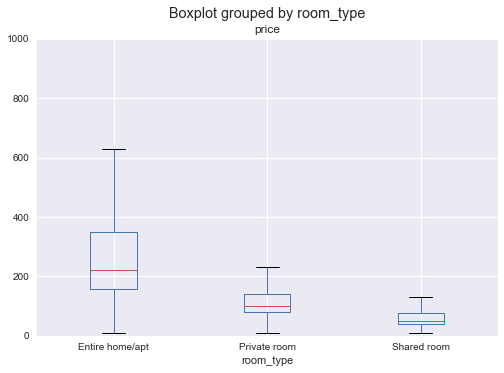

In [228]:
listing_data.boxplot(column='price', by='room_type')
plt.ylim(0,1000)
plt.show()

In [229]:
price_roomtype=listing_data.groupby('room_type')['price'].mean()
print(price_roomtype)

room_type
Entire home/apt    325.019477
Private room       142.640093
Shared room        192.270270
Name: price, dtype: float64


In [230]:
shared_room=listing_data[listing_data['room_type']=='Shared room']

In [231]:
shared_room['price'].describe()

count      185.000000
mean       192.270270
std       1042.911691
min         10.000000
25%         38.000000
50%         50.000000
75%         75.000000
max      10000.000000
Name: price, dtype: float64

In [232]:
# Dropping shared roomm listings
listing_data=listing_data[listing_data['room_type']!='Shared room']
listing_data.groupby('room_type')['price'].mean()

room_type
Entire home/apt    325.019477
Private room       142.640093
Name: price, dtype: float64

In [233]:
listing_data['price'].describe()

count     8520.000000
mean       251.446948
std        454.553358
min         10.000000
25%        105.000000
50%        165.000000
75%        259.250000
max      10000.000000
Name: price, dtype: float64

### Further data cleanings to look at listing with extremely low or high price to remove invalid listings

In [234]:
col_list=['id','listing_url','name','summary','description','price','street','room_type','number_of_reviews','availability_365']

In [235]:
#Taking a look at all the $10 listings
listing_data[col_list][listing_data['price']==10]

,id,listing_url,name,summary,description,price,street,room_type,number_of_reviews,availability_365
918,16792748,https://www.airbnb.com/rooms/16792748,Room across from Golden Gate Park,"Great Lone Mountain location, 2 blocks from US...","Great Lone Mountain location, 2 blocks from US...",10.0,"Richmond District, San Francisco, CA 94118, Un...",Private room,0,90
2275,11864708,https://www.airbnb.com/rooms/11864708,Annabel's House,This is a test listing to determine why the ad...,This is a test listing to determine why the ad...,10.0,"SoMa, San Francisco, CA 94103, United States",Entire home/apt,0,0
6452,5403210,https://www.airbnb.com/rooms/5403210,"This is a test listing, don't book.",Hellohellohello,Hellohellohello,10.0,"Tenderloin, San Francisco, CA 94102, United St...",Entire home/apt,0,0
6684,12886996,https://www.airbnb.com/rooms/12886996,Test listing - 4,asdfasdfa,asdfasdfa,10.0,"Civic Center, San Francisco, CA 94102, United ...",Entire home/apt,0,0
7304,13624690,https://www.airbnb.com/rooms/13624690,TEST: DO NOT BOOK Noe Valley sunny studio,Super spacious studio with lots of sunshine on...,Super spacious studio with lots of sunshine on...,10.0,"Noe Valley, San Francisco, CA 94114, United St...",Entire home/apt,0,0


In [236]:
#Removing all the $10 listings as they do not seem valid
listing_data=listing_data[listing_data['price']!=10]

In [237]:
#Remove listing inactive listings that have no availability in the next 365 days 
listing_data=listing_data[listing_data['availability_365']!=0]

In [238]:
listing_data['price'].describe()

count     5900.000000
mean       220.399492
std        341.043950
min         25.000000
25%        105.000000
50%        154.000000
75%        250.000000
max      10000.000000
Name: price, dtype: float64

In [239]:
low_listing=listing_data[col_list][listing_data['price']<=50]
low_listing

,id,listing_url,name,summary,description,price,street,room_type,number_of_reviews,availability_365
179,17682872,https://www.airbnb.com/rooms/17682872,~Spacious Single Room close to BART in Mission~,My place is close to 24th Street BART Station;...,My place is close to 24th Street BART Station;...,50.0,"Mission District, San Francisco, CA 94110, Uni...",Private room,1,9
249,7873804,https://www.airbnb.com/rooms/7873804,San Francisco Mission-July 1 - 14-Entire Apart...,I'll be on vacation and want you to enjoy San ...,I'll be on vacation and want you to enjoy San ...,50.0,"Mission District, San Francisco, CA 94103, Uni...",Entire home/apt,3,14
657,17237462,https://www.airbnb.com/rooms/17237462,Bass Guitar Room,This is a nice little room in a four bedroom h...,This is a nice little room in a four bedroom h...,30.0,"Mission District, San Francisco, CA 94110, Uni...",Private room,2,182
794,1785463,https://www.airbnb.com/rooms/1785463,Burgundy Room: OceanView+Breakfast+Parking+3 b...,"Our home faces Pacific Ocean. Breakfast, clean...","Our home faces Pacific Ocean. Breakfast, clean...",40.0,"Balboa Terrace, San Francisco, CA 94127, Unite...",Private room,67,354
820,1125079,https://www.airbnb.com/rooms/1125079,Brown Bedroom: Ocean View+Breakfast+Parking+3 ...,"Our home faces Pacific Ocean. Breakfast, clean...","Our home faces Pacific Ocean. Breakfast, clean...",39.0,"Balboa Terrace, San Francisco, CA 94127, Unite...",Private room,54,362
875,15107844,https://www.airbnb.com/rooms/15107844,Stay in the cheapest room in San Francisco!,You want to stay here because it is the cheape...,You want to stay here because it is the cheape...,50.0,"Balboa Terrace, San Francisco, CA 94127, Unite...",Private room,6,17
983,12203625,https://www.airbnb.com/rooms/12203625,"Petite room ""H""",Enjoy this room,Enjoy this room,39.0,"Richmond District, San Francisco, CA 94118, Un...",Private room,0,244
1480,14710249,https://www.airbnb.com/rooms/14710249,#103 Private Room in Hostel-Style House in Bay...,This is a small private room which can sleep t...,This is a small private room which can sleep t...,49.0,"San Francisco, CA 94124, United States",Private room,14,121
1495,16055807,https://www.airbnb.com/rooms/16055807,Private Room 105 in Hostel House,"Hello there, I have a small room available in ...","Hello there, I have a small room available in ...",50.0,"San Francisco, CA 94124, United States",Private room,1,47
1513,12275528,https://www.airbnb.com/rooms/12275528,Private Room 106 in Hostel House,This is a spacious private room which can slee...,This is a spacious private room which can slee...,50.0,"Bayview, San Francisco, CA 94124, United States",Private room,26,221


In [240]:
np.sum(listing_data['price']>=9000)

3

In [241]:
#Taking a look at the pricey listings over $9000 per night
listing_data[col_list][listing_data['price']>=9000]

,id,listing_url,name,summary,description,price,street,room_type,number_of_reviews,availability_365
1927,2417349,https://www.airbnb.com/rooms/2417349,NOT REAL,test,test,10000.0,"South Beach, San Francisco, CA 94105, United S...",Private room,0,365
2136,13086674,https://www.airbnb.com/rooms/13086674,Centrally Located Private Room,This listing was posted due to a hacking on my...,This listing was posted due to a hacking on my...,10000.0,"San Francisco, CA 94103, United States",Entire home/apt,2,365
4246,14893922,https://www.airbnb.com/rooms/14893922,Nob Hill Studio,我的房源靠近Ghirardelli Square、Gary Danko、Off the Gr...,我的房源靠近Ghirardelli Square、Gary Danko、Off the Gr...,9999.0,"Telegraph Hill, San Francisco, CA 94133, Unite...",Entire home/apt,0,83


In [242]:
#All of the listings above $9000 per night do not seem to be valid listings and therefore are removed
listing_data.drop([1927,2136,4246], inplace=True)

In [243]:
np.sum((listing_data['price']>=2000) & (listing_data['price']<9000))

11

In [244]:
#Taking a look at the listings above $1k per night
listing_data[col_list][(listing_data['price']>=2000) & (listing_data['price']<9000)]

,id,listing_url,name,summary,description,price,street,room_type,number_of_reviews,availability_365
66,1388523,https://www.airbnb.com/rooms/1388523,Mission Dolores Noe Valley Studio,Our studio apartment has been a great location...,Our studio apartment has been a great location...,4000.0,"Mission District, San Francisco, CA 94114, Uni...",Entire home/apt,40,362
2352,6692309,https://www.airbnb.com/rooms/6692309,SF's Unique Outdoor Urban Corporate Event Space,Contact (EMAIL HIDDEN) or at ((PHONE NUMBER HI...,Contact (EMAIL HIDDEN) or at ((PHONE NUMBER HI...,2000.0,"South Beach, San Francisco, CA 94107, United S...",Entire home/apt,0,365
2617,935967,https://www.airbnb.com/rooms/935967,Super Bowl Home In San Francisco,Luxury home in San Francisco's Portrero Hill. ...,Luxury home in San Francisco's Portrero Hill. ...,2000.0,"Potrero Hill, San Francisco, CA 94107, United ...",Entire home/apt,0,364
2651,900485,https://www.airbnb.com/rooms/900485,Family home Potrero Hill w/ View!!,Big open apt w views! Very nice for groups w c...,Big open apt w views! Very nice for groups w c...,2500.0,"Potrero Hill, San Francisco, CA 94107, United ...",Entire home/apt,2,365
4919,17776142,https://www.airbnb.com/rooms/17776142,☞Wedding Venue Villa Boutique Hotel for 100 to...,The Payne Mansion is considered one of the mos...,The Payne Mansion is considered one of the mos...,8500.0,"Western Addition/NOPA, San Francisco, CA 94109...",Entire home/apt,0,90
5238,8119395,https://www.airbnb.com/rooms/8119395,Grand 4-Level Painted Lady Victorian with Parking,Our 6000SF Painted Lady with a Walk Score of 9...,Our 6000SF Painted Lady with a Walk Score of 9...,2250.0,"Western Addition/NOPA, San Francisco, CA 94115...",Entire home/apt,4,197
5605,17776905,https://www.airbnb.com/rooms/17776905,☞ Wedding Venue in Boutique Hotel for 100 to 300,The Payne Mansion is considered one of the mos...,The Payne Mansion is considered one of the mos...,5500.0,"Western Addition/NOPA, San Francisco, CA 94109...",Private room,0,89
7075,8127495,https://www.airbnb.com/rooms/8127495,Beautiful Condo w/ View of the City,Come enjoy a redesigned and fresh new condo. T...,Come enjoy a redesigned and fresh new condo. T...,2000.0,"North Beach, San Francisco, CA 94133, United S...",Entire home/apt,0,365
7104,15160739,https://www.airbnb.com/rooms/15160739,Dream House for a Dream Party,My place is close to Historic renovated Libert...,My place is close to Historic renovated Libert...,5000.0,"Noe Valley, San Francisco, CA 94114, United St...",Entire home/apt,0,89
7390,1332629,https://www.airbnb.com/rooms/1332629,Superbowl Luxury San Francisco,Our contemporary luxury home is in the heart ...,Our contemporary luxury home is in the heart ...,2000.0,"Mission District, San Francisco, CA 94114, Uni...",Entire home/apt,2,365


In [245]:
#Remove listings that are ad for wedding venue and outdoor corporate event space
listing_data.drop([2352,4919,5605], inplace=True)

In [246]:
#Identify listings that are set up for testing purpose
listing_data[col_list][listing_data['name'].str.contains('Test')|listing_data['name'].str.contains('test')]

,id,listing_url,name,summary,description,price,street,room_type,number_of_reviews,availability_365
1924,17993344,https://www.airbnb.com/rooms/17993344,do not book - test,test do not book,test do not book,200.0,"SoMa, San Francisco, CA 94103, United States",Private room,0,365
3157,723583,https://www.airbnb.com/rooms/723583,Test: Bedroom in Duboce,NaN,Test test test test test,999.0,"Duboce Triangle, San Francisco, CA 94114, Unit...",Private room,0,365
3174,1614129,https://www.airbnb.com/rooms/1614129,Castro's Sweetest Spot,"Conveniently located near parks, cafes, muni, ...","Conveniently located near parks, cafes, muni, ...",110.0,"Duboce Triangle, San Francisco, CA 94114, Unit...",Private room,10,317


In [247]:
#Remove test listings
listing_data.drop([1924,3157], inplace=True)

In [248]:
#Identify listings that are set up for event venue
listing_data[col_list][listing_data['name'].str.contains('venue')|listing_data['name'].str.contains('Venue')]

,id,listing_url,name,summary,description,price,street,room_type,number_of_reviews,availability_365
3573,15465170,https://www.airbnb.com/rooms/15465170,Day Use Venue for Off-Sites Meetings,Avenue is an event studio and creative space p...,Avenue is an event studio and creative space p...,1050.0,"Bernal Heights, San Francisco, CA 94110, Unite...",Entire home/apt,2,363
3691,15252502,https://www.airbnb.com/rooms/15252502,Unique Venue for Fabulous Parties,Avenue is an event studio and creative space p...,Avenue is an event studio and creative space p...,675.0,"Bernal Heights, San Francisco, CA 94110, Unite...",Entire home/apt,0,362
3883,9275612,https://www.airbnb.com/rooms/9275612,Avenue,Avenue is an event studio and creative space p...,Avenue is an event studio and creative space p...,625.0,"Bernal Heights, San Francisco, CA 94110, Unite...",Entire home/apt,8,365
5078,17780402,https://www.airbnb.com/rooms/17780402,"☞Boutique Hotel, Venues & Event Spaces for 30",The Payne Mansion is considered one of the mos...,The Payne Mansion is considered one of the mos...,999.0,"Western Addition/NOPA, San Francisco, CA 94109...",Private room,0,89
5382,17780599,https://www.airbnb.com/rooms/17780599,"☞ Venues, Event Spaces for 60 at The Payne Man...",The Payne Mansion is considered one of the mos...,The Payne Mansion is considered one of the mos...,1999.0,"Western Addition/NOPA, San Francisco, CA 94109...",Private room,0,89
7620,2970867,https://www.airbnb.com/rooms/2970867,Shin Dig - Event Venue,1000 square foot meeting and event space perfe...,1000 square foot meeting and event space perfe...,1450.0,"Inner Sunset, San Francisco, CA 94122, United ...",Entire home/apt,1,362


In [249]:
#Remove Event Venue listings
listing_data.drop([3573,3691,3883,5078,5382,7620], inplace=True)

In [250]:
listing_data['price'].describe()

count    5886.000000
mean      211.750085
std       222.840307
min        25.000000
25%       105.000000
50%       153.000000
75%       250.000000
max      8000.000000
Name: price, dtype: float64

In [251]:
listing_data['neighbourhood_cleansed'].value_counts()

Mission                  663
Western Addition         468
South of Market          369
Downtown/Civic Center    369
Castro/Upper Market      340
Bernal Heights           320
Noe Valley               298
Haight Ashbury           270
Outer Sunset             215
Potrero Hill             203
Inner Richmond           200
Marina                   198
Nob Hill                 193
Pacific Heights          161
Outer Richmond           145
Russian Hill             137
Outer Mission            129
Excelsior                123
North Beach              114
Inner Sunset             111
West of Twin Peaks        99
Bayview                   98
Ocean View                90
Chinatown                 90
Parkside                  86
Financial District        76
Twin Peaks                72
Glen Park                 64
Lakeshore                 36
Visitacion Valley         28
Crocker Amazon            26
Presidio Heights          24
Treasure Island/YBI       21
Seacliff                  19
Diamond Height

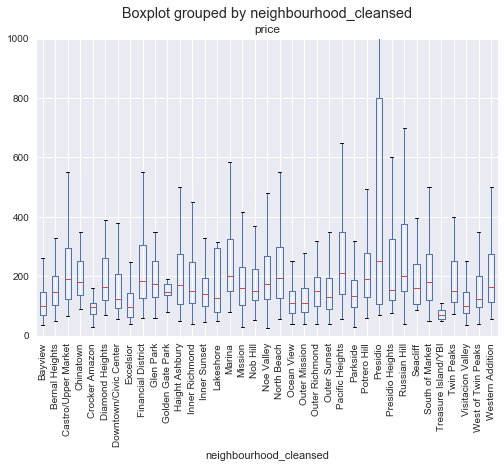

In [252]:
listing_data.boxplot(column='price', by='neighbourhood_cleansed')
plt.xticks(rotation=90)
plt.ylim(0,1000)
plt.show()

In [253]:
#The price of airbnb listing varies great in the Presidio dstrict because there are only 5 listings in the particular district.
#Taking a closer look listings in the Presidio distirct reveals that listing is over $1000 is for a tour bus instead of a home 
listing_data[col_list][listing_data['neighbourhood_cleansed']=='Presidio']

,id,listing_url,name,summary,description,price,street,room_type,number_of_reviews,availability_365
4267,3093543,https://www.airbnb.com/rooms/3093543,New private Studio w/Garden views.,Newly built private independent studio. Nicel...,Newly built private independent studio. Nicel...,105.0,"Presidio, San Francisco, CA 94118, United States",Entire home/apt,145,221
4268,1411264,https://www.airbnb.com/rooms/1411264,Amazing suite in designer home.,A great suite built just for casual use by our...,A great suite built just for casual use by our...,250.0,"San Francisco, CA, United States",Entire home/apt,12,365
4269,15633396,https://www.airbnb.com/rooms/15633396,Entire SF home for Summer short term/month rental,My place is close to Pacific Heights and the M...,My place is close to Pacific Heights and the M...,800.0,"San Francisco, CA, United States",Entire home/apt,0,75
4270,1961076,https://www.airbnb.com/rooms/1961076,Rent a Rockstar Tour Bus,Rent a Prevost XLII tour bus - perfect for cor...,Rent a Prevost XLII tour bus - perfect for cor...,1500.0,"Presidio, Chicago, IL 60614, United States",Entire home/apt,1,362
4271,16443050,https://www.airbnb.com/rooms/16443050,"A lovely and cosy room on wheels, views on demand","My place is close to anything in the city, Cri...","My place is close to anything in the city, Cri...",70.0,"San Francisco, CA 94123, United States",Entire home/apt,0,363


In [254]:
#Remove the tour bus listing
listing_data.drop(4270, inplace=True)

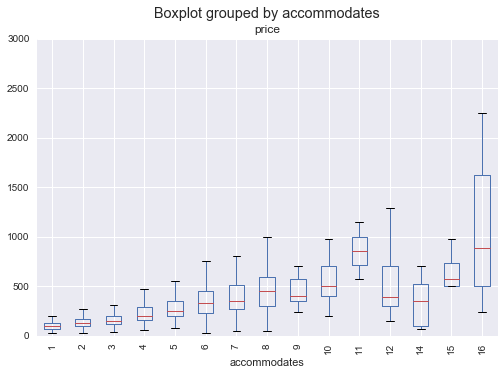

In [255]:
listing_data.boxplot(column='price', by='accommodates')
plt.xticks(rotation=90)
plt.ylim(0,3000)
plt.show()

In [256]:
listing_data[col_list][listing_data['accommodates']>=15]

,id,listing_url,name,summary,description,price,street,room_type,number_of_reviews,availability_365
182,16083525,https://www.airbnb.com/rooms/16083525,Off-site Meeting Space- Great Views of Sutro T...,This Off-site location (1300sqft Loft unit) is...,This Off-site location (1300sqft Loft unit) is...,500.0,"Mission District, San Francisco, CA 94110, Uni...",Entire home/apt,1,351
1503,10943013,https://www.airbnb.com/rooms/10943013,Sunny House Near Everywhere For Many SF Travel...,What everybody loves this space is its natural...,What everybody loves this space is its natural...,235.0,"Bayview, San Francisco, CA 94124, United States",Entire home/apt,13,149
2325,640352,https://www.airbnb.com/rooms/640352,Hip open floor plan loft in SoMa: 1 bed/1 spa ...,"Converted envelope factory, 1552 sq ft open fl...","Converted envelope factory, 1552 sq ft open fl...",975.0,"SoMa, San Francisco, CA 94103, United States",Entire home/apt,85,361
2389,8149387,https://www.airbnb.com/rooms/8149387,Mid Century SOMA 1600sqft Warehouse,"Our venue, is ideal to host private dinners, c...","Our venue, is ideal to host private dinners, c...",700.0,"SoMa, San Francisco, CA 94103, United States",Entire home/apt,35,364
3263,8920813,https://www.airbnb.com/rooms/8920813,Art Gallery for Private Events,Spark Arts is a beautiful and intimate gallery...,Spark Arts is a beautiful and intimate gallery...,1000.0,"The Castro, San Francisco, CA 94114, United St...",Entire home/apt,0,363
5238,8119395,https://www.airbnb.com/rooms/8119395,Grand 4-Level Painted Lady Victorian with Parking,Our 6000SF Painted Lady with a Walk Score of 9...,Our 6000SF Painted Lady with a Walk Score of 9...,2250.0,"Western Addition/NOPA, San Francisco, CA 94115...",Entire home/apt,4,197
5635,2397858,https://www.airbnb.com/rooms/2397858,Modern Light Airy House by GG Park/Beach w/par...,1930s light and airy residential French Trous...,1930s light and airy residential French Trous...,889.0,"San Francisco, CA 94121, United States",Entire home/apt,5,135
6011,7361644,https://www.airbnb.com/rooms/7361644,"Grand Haight 4BR Victorian, Parking","Make this elegant, 4 bedroom Victorian home pa...","Make this elegant, 4 bedroom Victorian home pa...",649.0,"Haight-Ashbury, San Francisco, CA 94117, Unite...",Entire home/apt,76,233
7104,15160739,https://www.airbnb.com/rooms/15160739,Dream House for a Dream Party,My place is close to Historic renovated Libert...,My place is close to Historic renovated Libert...,5000.0,"Noe Valley, San Francisco, CA 94114, United St...",Entire home/apt,0,89
7558,9739552,https://www.airbnb.com/rooms/9739552,Luxury Condo w. Additional Suite Option,Short-term Residential Rental Certificate #STR...,Short-term Residential Rental Certificate #STR...,500.0,"Inner Sunset, San Francisco, CA 94122, United ...",Entire home/apt,8,330


In [257]:
#Remove listing for non-residential usage
listing_data.drop([182,2389,3263,7104,7699], inplace=True)

# Data Exploration

In [258]:
by_roomtype=listing_data.groupby('room_type')['price'].count()
print(by_roomtype)

room_type
Entire home/apt    3447
Private room       2433
Name: price, dtype: int64


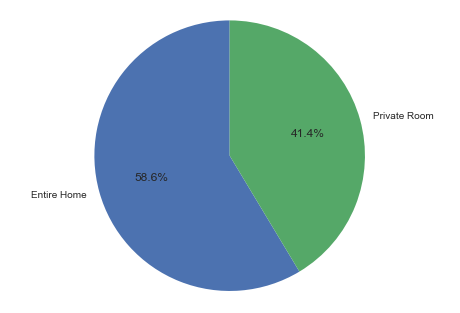

In [259]:
labels = 'Entire Home', 'Private Room'
sizes = by_roomtype

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### There are more Airbnb listings for entire home than private room in San Francisco. Approximately 60% of the listings are for entire home and 40% are private room listings.

In [260]:
room_listing=listing_data[listing_data['room_type']=='Private room']
house_listing=listing_data[listing_data['room_type']=='Entire home/apt']

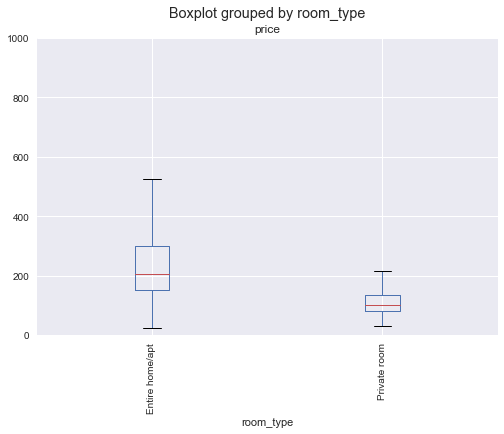

In [261]:
listing_data.boxplot(column='price', by='room_type')
plt.xticks(rotation=90)
plt.ylim(0,1000)
plt.show()

In [262]:
price_by_roomtype=listing_data.groupby('room_type')['price'].agg(['median','std'])
print(price_by_roomtype)

                 median         std
room_type                          
Entire home/apt   204.0  212.852275
Private room      100.0  181.016395


### The median price of entire home listings is more than double of that of the priviate room listings and entire home listings also exhibit a higher variance in price. Room type is a very important factor in terms of setting price for the Airbnb listings.

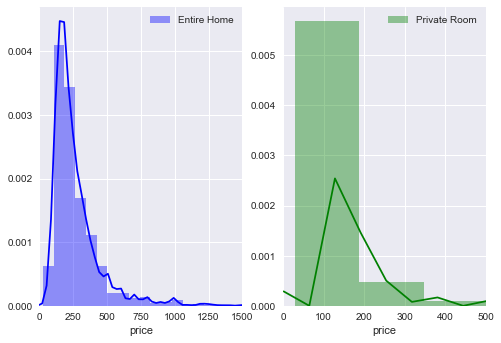

In [263]:
home_no_review = house_listing['price']
room_no_review = room_listing['price']
plt.subplot(1,2,1)
sns.distplot(home_no_review, color='b', label='Entire Home')
plt.xlim(0,1500)
plt.legend()
plt.subplot(1,2,2)
sns.distplot(room_no_review, color='g', label='Private Room')
plt.xlabel('price')
plt.xlim(0,500)
plt.legend()
plt.show()

#### The price distribution of both type of listiings are highly skewed to the right with some highly priced listings.

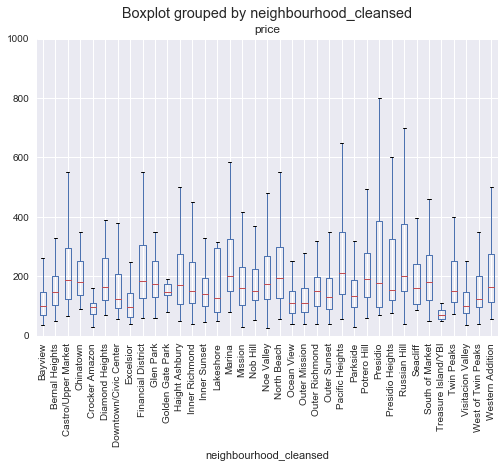

In [264]:
listing_data.boxplot(column='price', by='neighbourhood_cleansed')
plt.xticks(rotation=90)
plt.ylim(0,1000)
plt.show()

### The median price and price variance of  listings vary by neigbhourhood. Neighbourhood is a another important factor in terms of setting price for the Airbnb listings.

In [265]:
by_mult=listing_data.groupby(['neighbourhood_cleansed','room_type'])
count_mult=by_mult['price'].count()
count_mult=count_mult.unstack(level=1)
count_mult['Private room']=count_mult['Private room'].fillna(0)
count_mult['Total']=count_mult['Entire home/apt'] + count_mult['Private room']
count_mult['% Entire home']=count_mult['Entire home/apt']/count_mult['Total']*100
print(count_mult)

room_type               Entire home/apt  Private room  Total  % Entire home
neighbourhood_cleansed                                                     
Bayview                            36.0          62.0   98.0      36.734694
Bernal Heights                    201.0         119.0  320.0      62.812500
Castro/Upper Market               217.0         122.0  339.0      64.011799
Chinatown                          78.0          12.0   90.0      86.666667
Crocker Amazon                     12.0          14.0   26.0      46.153846
Diamond Heights                     8.0          10.0   18.0      44.444444
Downtown/Civic Center             190.0         179.0  369.0      51.490515
Excelsior                          59.0          64.0  123.0      47.967480
Financial District                 41.0          35.0   76.0      53.947368
Glen Park                          42.0          22.0   64.0      65.625000
Golden Gate Park                    5.0           3.0    8.0      62.500000
Haight Ashbu

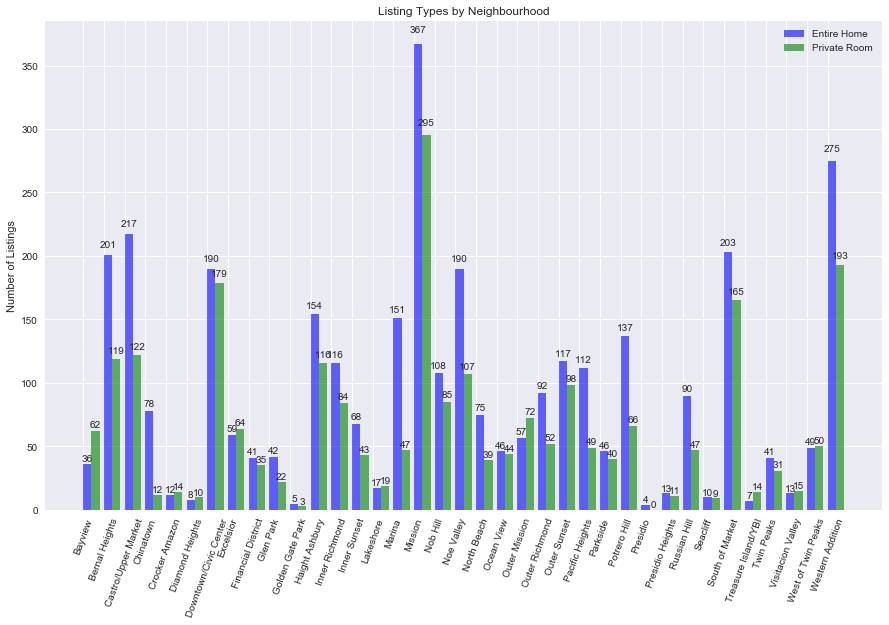

In [266]:
entire_home = count_mult['Entire home/apt']

ind = np.arange(len(entire_home))  
width = 0.4      # the width of the bars

fig, ax = plt.subplots(figsize=(15,9))
rects1 = ax.bar(ind, entire_home, width, color='b', alpha=0.6)

private_room = count_mult['Private room']
rects2 = ax.bar(ind + width, private_room, width, color='g', alpha=0.6)

ax.set_ylabel('Number of Listings')
ax.set_title('Listing Types by Neighbourhood')
ax.set_xticks(ind - width/2)
ax.set_xticklabels(count_mult.index, rotation=70)

ax.legend((rects1[0], rects2[0]), ('Entire Home', 'Private Room'))

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%d' % int(height),
                ha='center', va='bottom', fontsize=10)

autolabel(rects1)
autolabel(rects2)

plt.show()

### The top three neighbourhoods with the most Airbnb listings are 
1. Mission
2. Western Addition
3. South of Market

In [267]:
review_mult=by_mult['review_scores_rating'].mean()
review_mult=review_mult.unstack(level=1)
review_mult['Private room']=review_mult['Private room'].fillna(0)
print(review_mult)

room_type               Entire home/apt  Private room
neighbourhood_cleansed                               
Bayview                       92.687500     90.851852
Bernal Heights                95.938202     96.299065
Castro/Upper Market           96.712821     96.643478
Chinatown                     91.881356     85.166667
Crocker Amazon                90.090909     92.250000
Diamond Heights               96.714286     97.375000
Downtown/Civic Center         92.863309     82.945736
Excelsior                     93.090909     91.704918
Financial District            93.500000     92.035714
Glen Park                     95.800000     97.263158
Golden Gate Park              91.200000     82.000000
Haight Ashbury                94.753521     93.870968
Inner Richmond                94.861386     94.584416
Inner Sunset                  94.779661     94.133333
Lakeshore                     94.222222     94.625000
Marina                        95.021277     94.368421
Mission                     

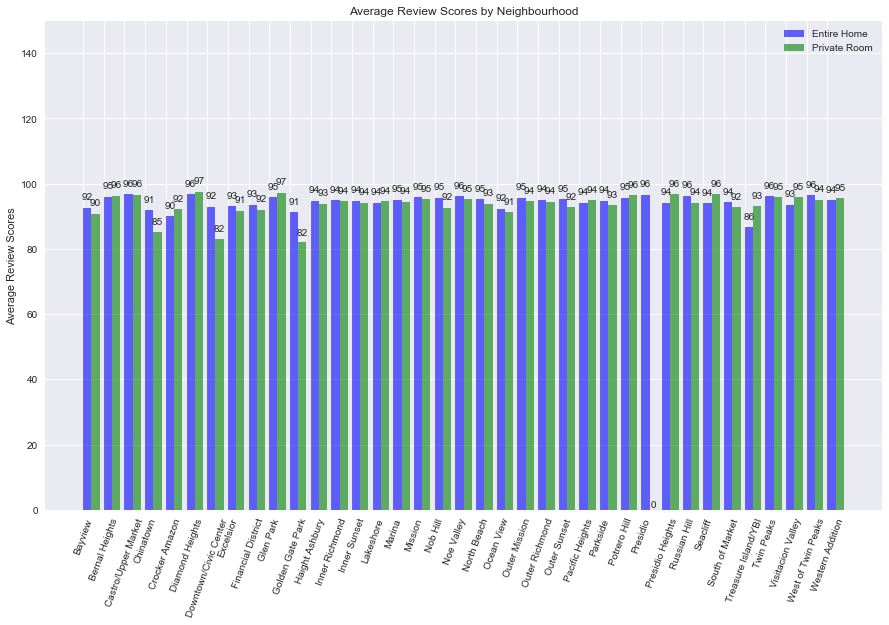

In [268]:
review_home = review_mult['Entire home/apt']

ind = np.arange(len(review_home))  
width = 0.4      # the width of the bars

fig, ax = plt.subplots(figsize=(15,9))
rects1 = ax.bar(ind, review_home, width, color='b', alpha=0.6)

review_room = review_mult['Private room']
rects2 = ax.bar(ind + width,review_room, width, color='g', alpha=0.6)

ax.set_ylabel('Average Review Scores')
ax.set_title('Average Review Scores by Neighbourhood')
ax.set_xticks(ind - width/2)
ax.set_xticklabels(count_mult.index, rotation=70)

ax.legend((rects1[0], rects2[0]), ('Entire Home', 'Private Room'))

autolabel(rects1)
autolabel(rects2)

plt.ylim(0,150)
plt.show()

### The average review score is high across all the neighbourhoods. The average review scores are all over 90's. There are only 4 neighbourhoods with average review score below 90. However, all these neighbourhoods have very few listings to begin with.
1. Chinatown (proviate room)
2. Downtown / Civic Center (Private room)
3. Golden Gate Park (Private room)
4. Treasure Island (Entire Home)

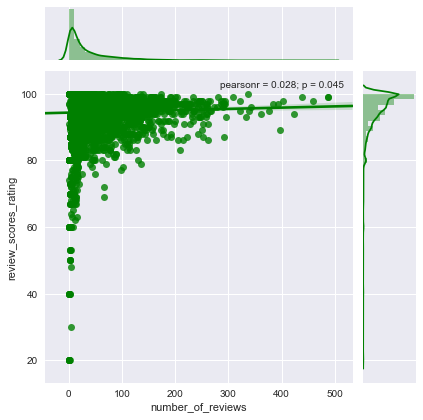

In [269]:
sns.jointplot(x='number_of_reviews', y='review_scores_rating', data=listing_data, kind='reg', color='g')
plt.show()

### The scatterplot above shows that there is not much of correlation between number of reviews and average review scores as users tend of rate high as we have observed before.

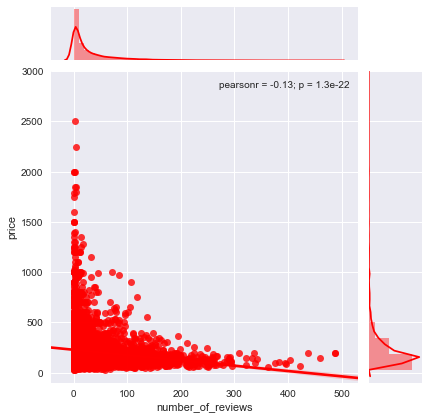

In [270]:
sns.jointplot(x='number_of_reviews', y='price', data=listing_data, kind='reg', color='r')
plt.ylim(-100,3000)
plt.show()

#### As user can leave a review after their trip, I am using number of reviews as the proxy for popularity. The scatterplot above shows that popularity and price and negatively correlated.  Listings with more reviews seem to be lower priced. However, the correlation is not very strong as the correlation cooefficient is only -0.13 so number of reviews does not seem to have  much practical significance in terms of setting price of the listings.

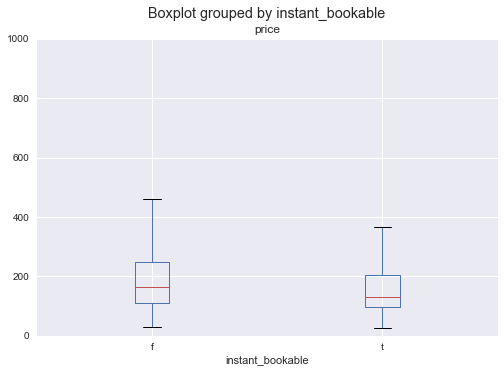

In [298]:
listing_data.boxplot(column='price', by='instant_bookable')
plt.ylim(0,1000)
plt.show()

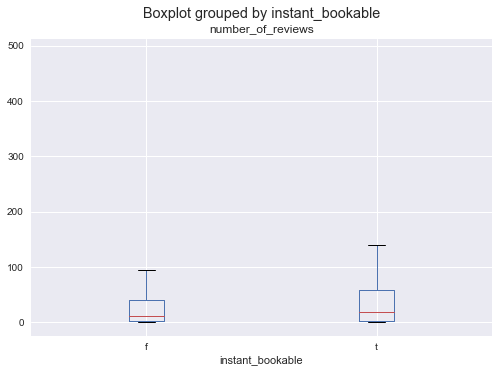

In [300]:
listing_data.boxplot(column='number_of_reviews', by='instant_bookable')
plt.show()

#### The price and popularity of the listings does not seem to vary much based on the factor whether they are instant bookable

## Analyzing Private Room Listings

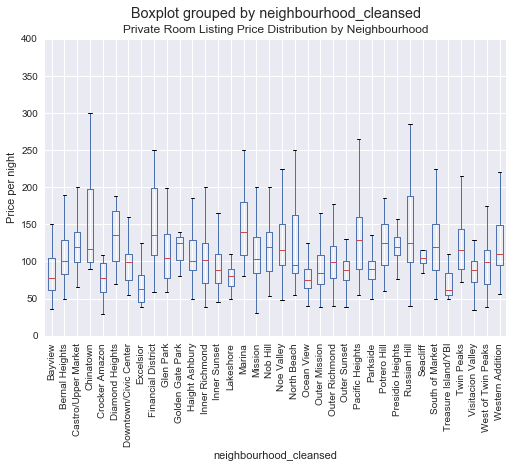

In [291]:
room_listing.boxplot(column='price', by='neighbourhood_cleansed')
plt.xticks(rotation=90)
plt.ylim(0,400)
plt.ylabel('Price per night')
plt.title('Private Room Listing Price Distribution by Neighbourhood')
plt.show()

#### Price of private room seems to vary greatly by neighbourhood 

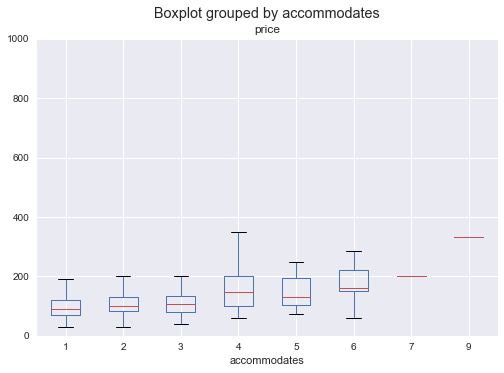

In [285]:
room_listing.boxplot(column='price', by='accommodates')
plt.ylim([0,1000])
plt.show()

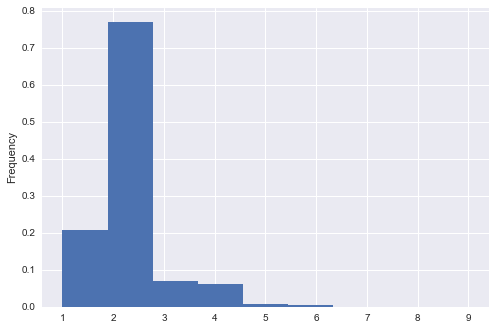

In [293]:
room_listing['accommodates'].plot(kind='hist', normed=True, bins=9)
plt.show()

#### More than 90% of the private room listings accomodates up to 2 people. While the box plot suggests the median price goes up as the max number of accommodation goes up. It will not be a good predictor given the low number of private room listings that can accomodate more than 2 people.

## Analyzing Entire Home/Apt Listings

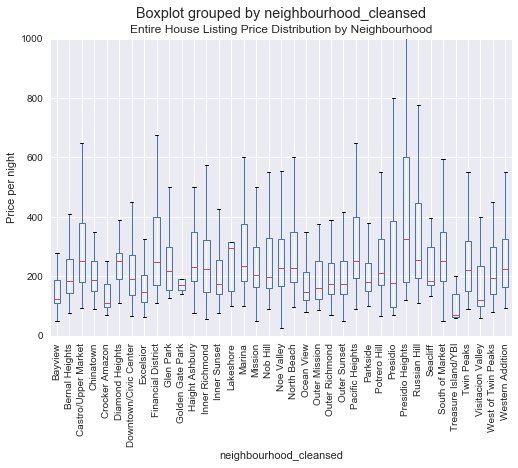

In [275]:
house_listing.boxplot(column='price', by='neighbourhood_cleansed')
plt.xticks(rotation=90)
plt.ylim(0,1000)
plt.ylabel('Price per night')
plt.title('Entire House Listing Price Distribution by Neighbourhood')
plt.show()

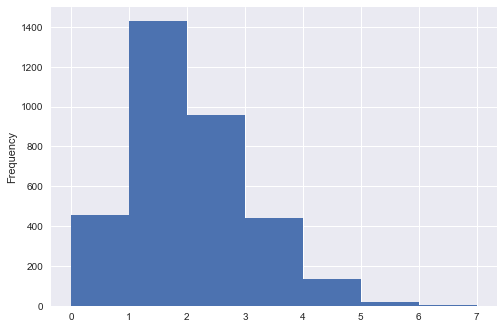

In [276]:
house_listing['bedrooms'].plot(kind='hist',bins=7)
plt.show()

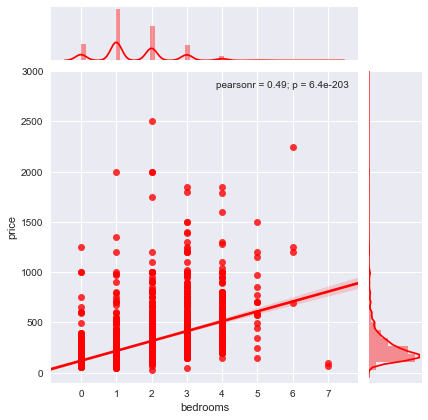

In [299]:
sns.jointplot(x='bedrooms', y='price', data=house_listing, kind='reg', color='r')
plt.ylim(-100,3000)
plt.show()

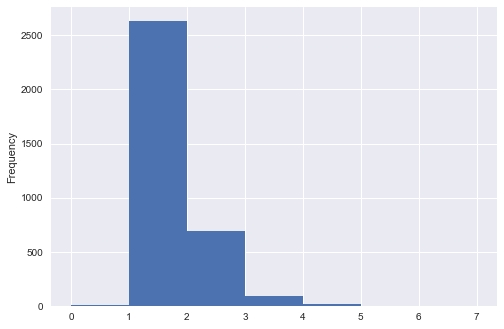

In [277]:
house_listing['bathrooms'].plot(kind='hist',bins=7)
plt.show()

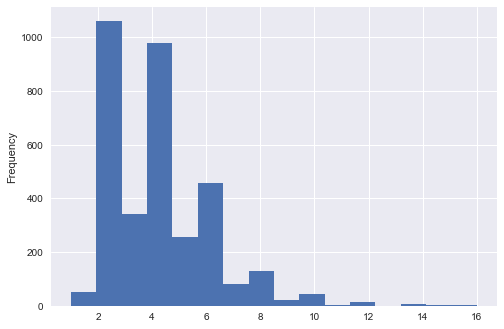

In [278]:
house_listing['accommodates'].plot(kind='hist',bins=16)
plt.show()

In [279]:
house_listing['beds'].describe()

count    3445.000000
mean        2.106241
std         1.302316
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: beds, dtype: float64

In [280]:
address=listing_data[['id','street','city','state','zipcode','country','latitude','longitude','is_location_exact']]
address.head()

,id,street,city,state,zipcode,country,latitude,longitude,is_location_exact
1,8053481,"Mission District, San Francisco, CA 94110, Uni...",San Francisco,CA,94110,United States,37.754166,-122.421534,t
5,936209,"Mission District, San Francisco, CA 94110, Uni...",San Francisco,CA,94110,United States,37.759495,-122.424874,t
6,7048973,"Mission District, San Francisco, CA 94110, Uni...",San Francisco,CA,94110,United States,37.760997,-122.413124,t
7,7998215,"San Francisco, CA 94110, United States",San Francisco,CA,94110,United States,37.750543,-122.416559,f
9,10406646,"Mission District, San Francisco, CA 94110, Uni...",San Francisco,CA,94110,United States,37.757246,-122.409315,t


In [281]:
address['lat']=address.latitude.astype(str)
address['lon']=address.longitude.astype(str)
address['zip']=address.zipcode.astype(str)
address.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

,id,street,city,state,zipcode,country,latitude,longitude,is_location_exact,lat,lon,zip
1,8053481,"Mission District, San Francisco, CA 94110, Uni...",San Francisco,CA,94110,United States,37.754166,-122.421534,t,37.7541662069,-122.421533611,94110
5,936209,"Mission District, San Francisco, CA 94110, Uni...",San Francisco,CA,94110,United States,37.759495,-122.424874,t,37.7594948752,-122.4248737,94110
6,7048973,"Mission District, San Francisco, CA 94110, Uni...",San Francisco,CA,94110,United States,37.760997,-122.413124,t,37.7609968698,-122.413123707,94110
7,7998215,"San Francisco, CA 94110, United States",San Francisco,CA,94110,United States,37.750543,-122.416559,f,37.7505428225,-122.416558542,94110
9,10406646,"Mission District, San Francisco, CA 94110, Uni...",San Francisco,CA,94110,United States,37.757246,-122.409315,t,37.7572464171,-122.409314714,94110


In [282]:
address['url']='http://api.walkscore.com/score?format=json&address=San%Francisco%20CA%'+address.zip+'&lat='+address.lat+'&lon='+address.lon+'&transit=1&bike=1&wsapikey=ffd1c56f9abcf84872116b4cc2dfcf31'
address.to_csv('address.csv')


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
